# 初见数据

## 引言

在本节中，将设置数据的路径，以便可以加载它们。这将允许解释数据结构并进行一些健全性检查。最后，下面是一些关于如何执行原始数据的简单绘图的示例。

导入所需的模块：

In [18]:
import os
import os.path as op
# import openneuro # 可用这个包直接下载数据集，当然datalad更方便
import matplotlib
matplotlib.use('TKAgg')

import numpy as np
import mne
from mne_bids import BIDSPath, read_raw_bids 

## 加载数据

MEGIN数据以FIF格式存储，这是一种嵌入标签的二进制格式。

第一步是设置数据的路径以及文件名。请注意，这将取决于您存储数据集的位置。 


### 文件概述
本章依赖于文件（嵌入在BIDS结构中）：
~~~
<BIDS_ROOT>/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-01_meg.fif
~~~

### 加载BIDS数据

有两种方法可以获取数据。
1.运行下面的代码，使用他们的python模块直接从opennero网站下载。

2.访问[OpenNeuro]（https://openneuro.org/datasets/ds004346/versions/1.0.2） 并使用浏览器手动下载数据。

In [2]:
# 1. Follow these instructions if you are downloading the data directly from openneuro:

# dataset = 'ds004346'  # dataset ID in openneuro

# bids_root = r'THE PATH TO WHERE YOU WANT TO DOWNLOAD THE DATA'
# bids_root = '/Volumes/jenseno-avtemporal-attention/Projects/FLUX/data'

# download the dataset from openneuro
# openneuro.download(dataset=dataset, target_dir=bids_root)

# 2. Follow these instruction if you already have downloaded the data from openneuro to a local directory

# The folder just under bids_root is called sub-01
# 下的数据集不完整，先使用ds000117数据集尝试处理一下
bids_root = r'/home/ubuntu/database/ds004346'
# bids_root = r'/home/ubuntu/database/ds000117-Ms_Mm_Face'

<div class="alert alert-block alert-danger">
<b>Warning:<br />
    </b> 在继续本教程之前，请确保下载完成。此步骤可能很长，具体取决于您的Internet连接速度。

下一步是准备读取数据。这需要创建mne_bids. BIDSPath，它指向MNE-BIDS结构的路径。

In [15]:
subject = '01'
session = 'meg'
task = 'facerecognition'  # name of the task
run = '01'  # we have two runs for this subject, let's look at run = 1
# data_tpye = 'meg'
suffix = 'meg'

bids_path = BIDSPath(subject=subject, session=session, task=task, run=run, suffix=suffix, root=bids_root)

In [11]:
subject = '01'
session = '01'
task = 'SpAtt'  # name of the task
run = '02'  # we have two runs for this subject, let's look at run = 1
suffix = 'meg'

bids_path = BIDSPath(subject=subject, session=session,
task=task, run=run, suffix=suffix, root=bids_root)

FIF文件的文件大小有限制。如果MEG记录超过此限制，MEGIN采集系统会自动将数据拆分为两个或多个FIF文件。在这种情况下，通过读取第一个FIF文件，MNE-Python将自动读取所有链接的拆分文件。在本例中，示例数据集被操作员分成2个子文件，需要一个接一个地读取它们。

我们现在创建了BIDSPath对象，让我们读取第一个meg文件：

In [12]:
print(bids_path)
# raw1 = read_raw_bids(bids_path=bids_path, verbose=False)
raw1 = read_raw_bids(bids_path=bids_path, verbose=False)

/home/ubuntu/database/ds004346/sub-01/ses-01/meg/sub-01_ses-01_task-SpAtt_run-02_meg.fif


/tmp/ipykernel_717767/3241470668.py:3: RuntimeWarning: This filename (/home/ubuntu/database/ds004346/.git/annex/objects/GP/Xf/SHA256E-s1972524944--bc5b9ecfed5898b5090e66ef59aec7deca986299a9fe0c550f7a5c1478748c8d.fif/SHA256E-s1972524944--bc5b9ecfed5898b5090e66ef59aec7deca986299a9fe0c550f7a5c1478748c8d.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw1 = read_raw_bids(bids_path=bids_path, verbose=False)


## 检查数据

要从FIF文件中获取一些基本信息，请写入：

In [13]:
print(raw1)

<Raw | SHA256E-s1972524944--bc5b9ecfed5898b5090e66ef59aec7deca986299a9fe0c550f7a5c1478748c8d.fif, 343 x 1434000 (1434.0 s), ~521 KiB, data not loaded>


527 kB是指数据集的大小。1457.0 s是记录时间。由于采样率为1000 Hz，这导致在343个通道中记录了1457000个样本。这些通道包括MEG、EOG、触发器通道等。

要获取一些附加信息：

In [14]:
print(raw1.info)

<Info | 21 non-empty values
 acq_pars: ACQactiveGround 1 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG001, EOG002, ECG003, IASX+, IASX-, IASY+, IASY-, IASZ+, ...
 chs: 6 misc, 11 Internal Active Shielding data (Triux systems), 102 Magnetometers, 204 Gradiometers, 18 Stimulus, 2 System status channel information (Triux systems)
 custom_ref_applied: False
 description: Anonymized using a time shift to preserve age at acquisition
 dev_head_t: MEG device -> head transform
 dig: 403 items (3 Cardinal, 4 HPI, 396 Extra)
 events: 1 item (list)
 experimenter: mne_anonymize
 file_id: 4 items (dict)
 gantry_angle: 68.0
 highpass: 0.1 Hz
 hpi_results: 1 item (list)
 line_freq: 50.0
 lowpass: 330.0 Hz
 meas_date: 2000-01-01 00:00:00 UTC
 meas_id: 4 items (dict)
 nchan: 343
 proj_name: mne_anonymize
 projs: generated with autossp-1.2.0: off, generated with autossp-1.2.0: ...
 sfreq: 1000.0 Hz
 subject_info: <subject_info | his_id: sub-01, birthday: 1956-01-01, sex: 0, ha

此信息显示了数据集的重要参数。例如，龙门架定位在68度（*gantry_angle*），采样频率为1000赫兹（*sfreq*）。在数字采样之前，数据在330.0赫兹（*低通*）和0.1赫兹（*高通*）进行了低通滤波。*实验者*是匿名的，记录数据没有意义，不符合欧盟数据保护法规则。 


**问题1：** 330 Hz低通滤波器的用途是什么（提示：参见用于数据转换的模拟滤波器，第3章；Smith等人，1999年）

**问题2：** 0.1 Hz高通滤波器的用途是什么？


data对象（'raw1'）允许通过计算光谱来简单检查数据：

In [15]:
# 首先获取数据长度
data_length = len(raw1.times)
data_length

1434000

In [16]:
# raw1.load_data()
# n_fft = 2 ** int(np.log2(data_length / 4))
n_fft = 2000
data1PSD = raw1.compute_psd(method="welch", fmin=1, fmax=60, picks="meg", n_fft=n_fft, n_overlap=int(n_fft/2))

Effective window size : 2.000 (s)


这里应用了标准的韦尔奇方法。数据被分成2秒长的部分（2000个样本）和1秒重叠的部分（1000个样本）。这导致了0.5赫兹的分辨率。在计算每个部分的FFT之前，乘以汉明锥度。

要绘制数据，请写入：

Plotting power spectral density (dB=True).


/home/ubuntu/miniconda3/envs/torch/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


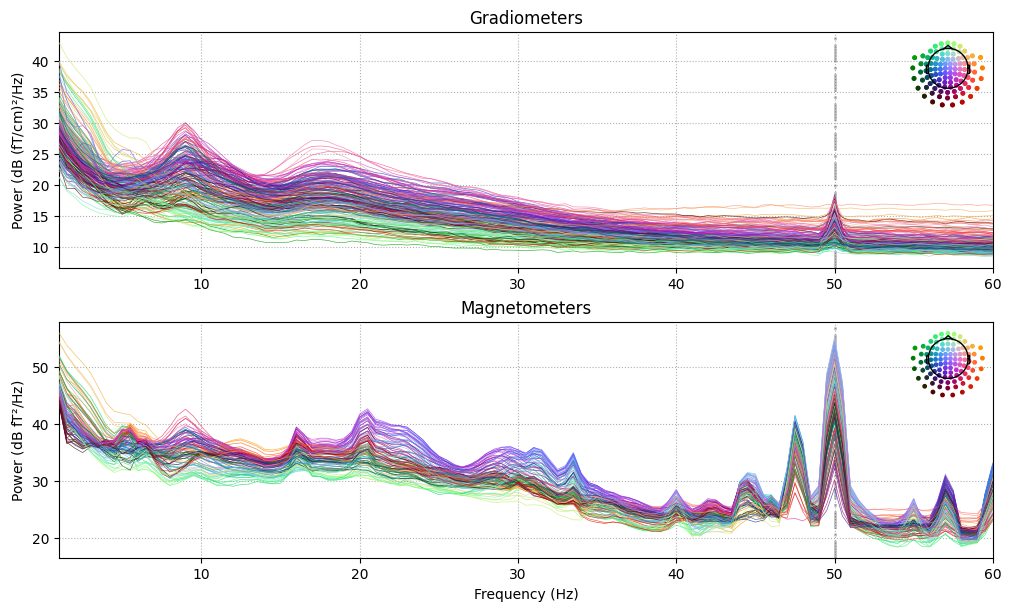

In [17]:
# The line below enables inline plotting in Jupyter Notebooks, displaying plots below code cells.
%matplotlib inline  
data1PSD.plot();

注意梯度计中10 Hz的α活动以及50 Hz的线路噪声。线路噪声的频率在包括俄罗斯在内的欧洲国家为50赫兹，而在韩国以及南美和北美为60赫兹。在日本，根据地区的不同，它可以是50赫兹或60赫兹。

**问题3：** 为什么磁力计的线路噪声比梯度计的线路噪音大50 Hz？

要使用绘图工具的交互式功能显示原始数据，请编写：

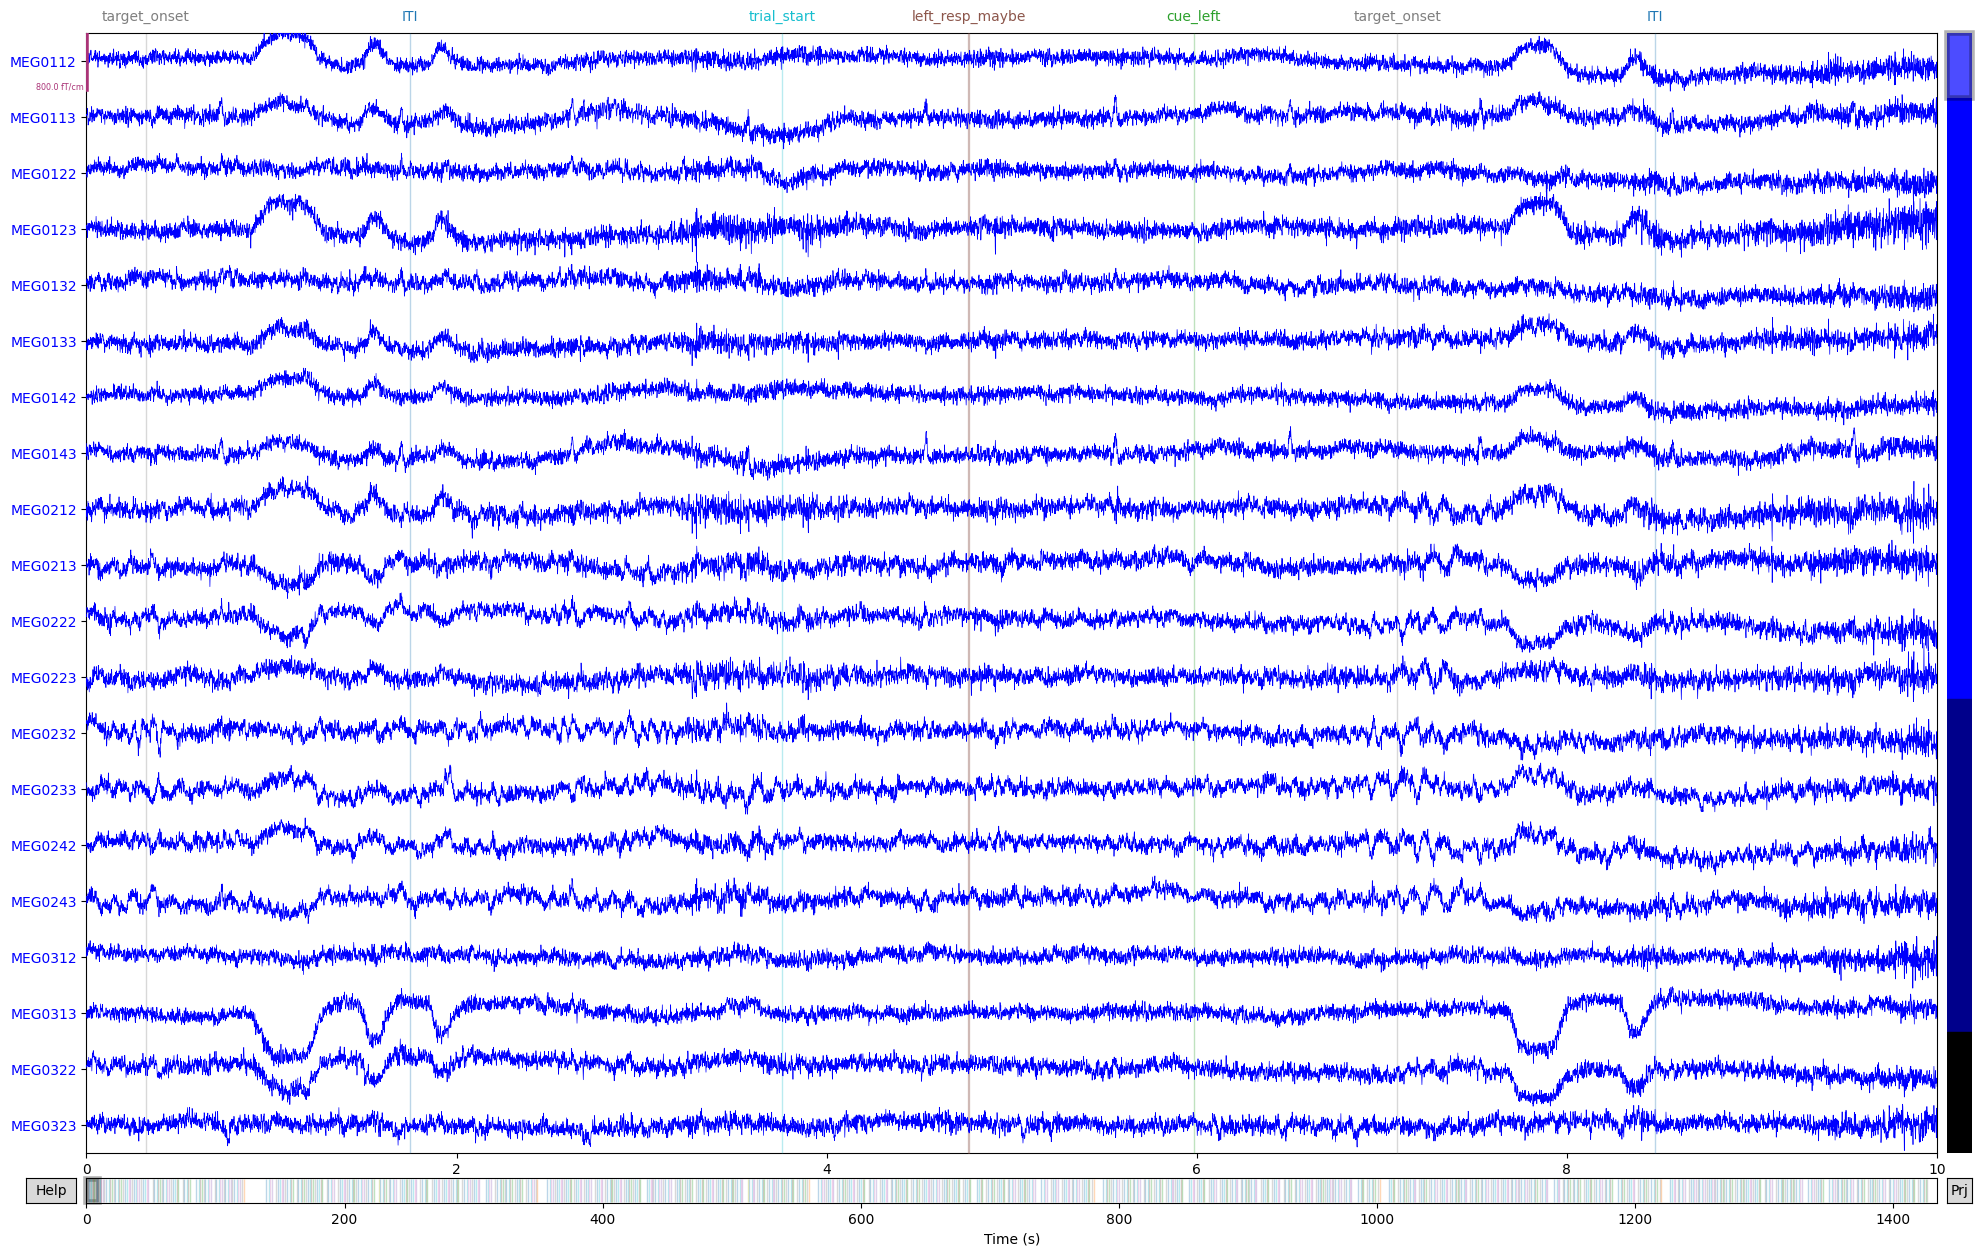

Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none


In [ ]:
# %matplotlib tk
raw1.plot(duration=10, title='Raw')

这将在新窗口中打开绘图。使用箭头键在通道和时间之间移动。点击帮助按钮了解更多信息。

**问题4:** 滚动MEG数据并识别以下伪影（包括回复中的数字）：

- 眨眼
- 肌肉收缩（以高频活动为特征）
- 心脏伪影

## 预注册和发布

预配准：报告采样频率和抗混叠低通滤波器的特性。还要报告要记录的外围数据（例如EOG和ECG）。

发布，例如：

"The ongoing MEG data were recorded using the TRIUX system from MEGIN. This system consists of 102 magnetometers and 204 planar gradiometers. Each of the 102 sensor locations has one magnetometer and a set of two orthogonal gradiometers. The horizontal and vertical EOG data, as well as the ECG, were also collected alongside the MEG data. All the data were sampled at 1000 Hz and stored for offline analysis. Prior to sampling, a lowpass filter at ~330 Hz was applied. To record the horizontal EOG, a pair of electrodes were attached approximately 2.5 cm away from the outer canthus of each eye. To record the vertical EOG, a pair of electrodes were placed above and below the right eye in line with the pupil. The ECG was recorded from a pair of electrodes placed on the left and right collarbone. In addition, four head position indicator coils (HPIs) were placed behind the left and right ear, as well as on the left and right forehead just below the hairline. The positions of the HPIs, the nasion, the left and right preauricular points, as well as the surface points of the scalp, were digitized using a Polhemus device."


## References
Smith, W.S. (1997) The Scientist and Engineer's Guide to Digital Signal Processing. California Technical Publishing. ISBN 0-9660176-3-3 [Online version](http://www.dspguide.com/)